# Weight Initialization

## Our test model for this practical task

In [1]:
# Use the below functionality to execute your model (that you will adjust later step by step)
# This block of code provides you the functionality to train a model. Results are printed after each epoch

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import tqdm


def load_mnist_data(root_path='./data', batch_size=4):
    """
    Loads MNIST dataset into your directory.
    You can change the root_path to point to a already existing path if you want to safe a little bit of memory :)
    """
    transform = transforms.Compose(
        [transforms.ToTensor(),
        transforms.Normalize((0.5), (0.5))]
    )

    trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

    testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

    return trainloader, testloader


def train_model(model, batch_size: int = 4, epochs: int = 10):
    # we only consider the mnist train data for this example
    train_loader, _ = load_mnist_data()

    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
    model = model.to(device)

    iterations = 0
    for epoch in range(epochs):
        running_loss = 0.0
        running_accuracy = []
        for imgs, targets in tqdm.tqdm(train_loader, desc=f'Training iteration {epoch + 1}'):
            iterations += 1
            imgs, targets = imgs.to(device=device), targets.to(device=device)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(imgs.reshape(imgs.shape[0], -1))
            for i,j in enumerate(outputs):
                # print(outputs[i])
                outputs[i]= j.argmax()
            # print(outputs)

            loss = criterion(outputs, targets)
            grad = loss.backward() #->CALCULATE GRADIENT
            optimizer.step() #->update Weights

            # print statistics
            running_loss += loss.item()

            # Calculate the Accuracy (how many of all samples are correctly classified?)
            max_outputs = torch.max(outputs, dim=1).indices
            accuracy = (max_outputs.detach() == targets.detach()).to(dtype=torch.float32).mean()
            running_accuracy.append(accuracy)
    
        print(f'Epoch {epoch + 1} finished with loss: {running_loss / len(train_loader):.3f} and accuracy {torch.tensor(running_accuracy).mean():.3f}')

## Training progress with different weight settings

In [2]:
# You can use this model for your tests (of course you can change the architecture a little, but it should not be necessary.)
import torch
import torch.nn as nn


model = nn.Sequential(
    nn.Linear(784, 32),  # input layer (do not change the in_features size of this layer - we need it later)
    nn.Linear(32, 32),
    nn.Linear(32, 10)  # you can change the in_features of this layer but let the out_features at size 10 here - we need it layer
)

### Weight settings

In [3]:
# Find out how to change the weights of the layers from your neural network.
# ATTTENTION: Write your code inside the "with torch.no_grad():" section! This is necessary for changing the weights of the layers

#### Zero weights

In [4]:
# Set all weights and biases of your network to zero

with torch.no_grad():
    # Code here
    for weights in model.state_dict().values():
        weights[:]=0




In [5]:
# Train the network with your new settings and take a look at the results
# Run the model training
train_model(model=model, batch_size=32, epochs=4)

# What can you observe?
# there is no learning happening

Training iteration 1: 100%|██████████| 15000/15000 [00:49<00:00, 300.29it/s]


Epoch 1 finished with loss: 2.303 and accuracy 0.099


Training iteration 2: 100%|██████████| 15000/15000 [00:50<00:00, 297.37it/s]


Epoch 2 finished with loss: 2.303 and accuracy 0.099


Training iteration 3: 100%|██████████| 15000/15000 [00:49<00:00, 303.49it/s]


Epoch 3 finished with loss: 2.303 and accuracy 0.099


Training iteration 4:  42%|████▏     | 6338/15000 [00:21<00:30, 282.37it/s]

#### Constant weights

In [ ]:
# Set all weights and biases to constant numbers (e.g. 0.5)
# How does the training progress?

with torch.no_grad():
    # Code here
    for weights in model.state_dict().values():
        weights[:]=0.5


In [ ]:
# Train the network with your new settings and take a look at the results
# Run the model training
train_model(model=model, batch_size=32, epochs=4)

# What can you observe?
# the network learns but at a super slow rate

Training iteration 1: 100%|██████████| 15000/15000 [00:41<00:00, 358.53it/s]


Epoch 1 finished with loss: 92.285 and accuracy 0.105


Training iteration 2: 100%|██████████| 15000/15000 [00:42<00:00, 353.86it/s]


Epoch 2 finished with loss: 2.309 and accuracy 0.105


Training iteration 3: 100%|██████████| 15000/15000 [00:43<00:00, 347.94it/s]


Epoch 3 finished with loss: 2.309 and accuracy 0.105


Training iteration 4: 100%|██████████| 15000/15000 [00:44<00:00, 334.31it/s]


Epoch 4 finished with loss: 2.308 and accuracy 0.102


In [ ]:
# Let us also take a look at the gradient of the output layer
# Access the gradients at the output layer of your model and analyze them

# We first input some random values
# forward + backward
model=model.to(torch.device('cuda') )
outputs = model(torch.randn(size=(1,784)).to(torch.device('cuda') )).to(torch.device('cuda'))
loss = nn.CrossEntropyLoss()(outputs, torch.tensor([1]).to(torch.device('cuda')))
loss.backward()

# Code here
print(model[2].weight.grad)


# What can you observe?
# What we can observe is, that the model changes the weight always the same amount making it unable to learn.

tensor([[ 0.6968,  0.6968,  0.6968,  0.6968,  0.6968,  0.6968,  0.6968,  0.6968,
          0.6968,  0.6968,  0.6968,  0.6968,  0.6968,  0.6968,  0.6968,  0.6968,
          0.6968,  0.6968,  0.6968,  0.6968,  0.6968,  0.6968,  0.6968,  0.6968,
          0.6968,  0.6968,  0.6968,  0.6968,  0.6968,  0.6968,  0.6968,  0.6968],
        [-7.0244, -7.0244, -7.0244, -7.0244, -7.0244, -7.0244, -7.0244, -7.0244,
         -7.0244, -7.0244, -7.0244, -7.0244, -7.0244, -7.0244, -7.0244, -7.0244,
         -7.0244, -7.0244, -7.0244, -7.0244, -7.0244, -7.0244, -7.0244, -7.0244,
         -7.0244, -7.0244, -7.0244, -7.0244, -7.0244, -7.0244, -7.0244, -7.0244],
        [ 0.7080,  0.7080,  0.7080,  0.7080,  0.7080,  0.7080,  0.7080,  0.7080,
          0.7080,  0.7080,  0.7080,  0.7080,  0.7080,  0.7080,  0.7080,  0.7080,
          0.7080,  0.7080,  0.7080,  0.7080,  0.7080,  0.7080,  0.7080,  0.7080,
          0.7080,  0.7080,  0.7080,  0.7080,  0.7080,  0.7080,  0.7080,  0.7080],
        [ 1.2138,  1.2138

#### Unusual weights

In [ ]:
# Set some weights (around 50%) of every model of the model to some weird value, e. g. extremely high (> 10.0) or extremely low (< 1e-7).
# How does the training progress? 
# Can your model also diverge instead of converge because the weights were way to high or low?

with torch.no_grad():
    # Code here
    for weights in model.state_dict().values():
        weights[::2]=10
        

tensor([[10.0000, 10.0000, 10.0000,  ..., 10.0000, 10.0000, 10.0000],
        [ 0.3263,  0.3263,  0.3263,  ...,  0.3263,  0.3263,  0.3263],
        [10.0000, 10.0000, 10.0000,  ..., 10.0000, 10.0000, 10.0000],
        ...,
        [ 0.3263,  0.3263,  0.3263,  ...,  0.3263,  0.3263,  0.3263],
        [10.0000, 10.0000, 10.0000,  ..., 10.0000, 10.0000, 10.0000],
        [ 0.3263,  0.3263,  0.3263,  ...,  0.3263,  0.3263,  0.3263]],
       device='cuda:0')
tensor([10.0000,  0.6737, 10.0000,  0.6737, 10.0000,  0.6737, 10.0000,  0.6737,
        10.0000,  0.6737, 10.0000,  0.6737, 10.0000,  0.6737, 10.0000,  0.6737,
        10.0000,  0.6737, 10.0000,  0.6737, 10.0000,  0.6737, 10.0000,  0.6737,
        10.0000,  0.6737, 10.0000,  0.6737, 10.0000,  0.6737, 10.0000,  0.6737],
       device='cuda:0')
tensor([[1.0000e+01, 1.0000e+01, 1.0000e+01,  ..., 1.0000e+01, 1.0000e+01,
         1.0000e+01],
        [3.4562e-04, 3.4562e-04, 3.4562e-04,  ..., 3.4562e-04, 3.4562e-04,
         3.4562e-04],
   

In [ ]:
# Train the network with your new settings and take a look at the results
# Run the model training
train_model(model=model, batch_size=4, epochs=5)

# What can you observe?
# there is no learning because the high weights causes the exploding gradient problem

Training iteration 1: 100%|██████████| 15000/15000 [00:46<00:00, 321.57it/s]


Epoch 1 finished with loss: nan and accuracy 0.099


Training iteration 2: 100%|██████████| 15000/15000 [00:45<00:00, 326.63it/s]


Epoch 2 finished with loss: nan and accuracy 0.099


Training iteration 3: 100%|██████████| 15000/15000 [00:45<00:00, 330.03it/s]


Epoch 3 finished with loss: nan and accuracy 0.099


Training iteration 4: 100%|██████████| 15000/15000 [00:45<00:00, 327.47it/s]


Epoch 4 finished with loss: nan and accuracy 0.099


Training iteration 5: 100%|██████████| 15000/15000 [00:44<00:00, 338.51it/s]


Epoch 5 finished with loss: nan and accuracy 0.099


## Weight initialization techniques

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


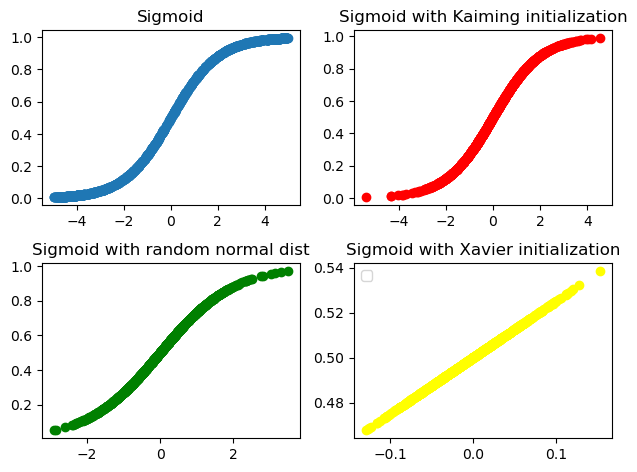

In [ ]:
# We now take a closer look to the sigmoid activation function.
# Where does the sigmoid function creates small gradients and where are the biggest gradient?

# Explanation here


# Now lets plot some different activation function methods
# Use matplotlib and plot the sigmoid activation function into the plot.
# Create 1000 sample points from x-values [-5.0, 5.0] and create y = Sigmoid(x) and plot the result. (The result should simply be the sigmoid curve)
# You can use the Sigmoid function from PyTorch here!

import matplotlib.pyplot as plt
import numpy as np
import torch
# Code here
fig, ax = plt.subplots(2,2)
val = np.random.uniform(-5,5,(1000,1))
y=torch.sigmoid(torch.from_numpy(val))
ax[0][0].scatter(val,y)
ax[0][0].set_title('Sigmoid')
# Now lets plot the kaiming normal weight initialization into the plot
# Create 1000 points (x) sampled from the kaiming_normal_ (pytorch function) and create y = Sigmoid(kaiming_normal(1000)) and plot the result into the same plot as before.
# Use a different color for plotting the results


# Code here
val= torch.empty(1000,1)
torch.nn.init.kaiming_normal_(val)
y=torch.sigmoid(val)
ax[0][1].scatter(val,y,c=['red'])
ax[0][1].set_title('Sigmoid with Kaiming initialization')



# Now lets plot a random normal (torch.randn) weight initialization into the plot
# Create 1000 points (x) sampled from the randn (pytorch function) and create y = Sigmoid(randn(1000)) and plot the result into the same plot as before.
# Use a different color for plotting the results

# Code here
val= torch.randn((1000,1))
y=torch.sigmoid(val)
ax[1][0].scatter(val,y,c=['green'])
ax[1][0].set_title('Sigmoid with random normal dist')


# Now lets plot a xavier_normal weight initialization into the plot
# Create 1000 points (x) sampled from the xavier_normal_ (pytorch function) and create y = Sigmoid(xavier_normal_(1000)) and plot the result into the same plot as before.
# Use a different color for plotting the results


# Code here
val= torch.empty(1000,1)
torch.nn.init.xavier_normal_(val)
y=torch.sigmoid(val)
ax[1][1].scatter(val,y,c=['yellow'])
ax[1][1].set_title('Sigmoid with Xavier initialization')


fig.tight_layout(pad=1.0)
plt.legend()
plt.show()


# Which weight initialization technique is best when using sigmoid activation function?

# Answer here
# Kaiming initialization works better with the sigmoid activation function

## Be creative and test some other weight initialization techniques! - There is so much to explore!